In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
import math


In [2]:
video = pd.read_csv("Video_Games_Sales_as_at_22_Dec_2016.csv")

In [3]:
video.head(2)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
video.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [5]:
video.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [6]:
video = video[video['Year_of_Release'] <= 2016.0]
video[video.isnull().any(axis=1)].count()

Name               9619
Platform           9621
Year_of_Release    9621
Genre              9619
Publisher          9589
NA_Sales           9621
EU_Sales           9621
JP_Sales           9621
Other_Sales        9621
Global_Sales       9621
Critic_Score       1158
Critic_Count       1158
User_Score         3014
User_Count          638
Developer          3081
Rating             2943
dtype: int64

In [7]:
df = video.dropna()

In [8]:
df['Year_of_Release'] = df['Year_of_Release'].astype(np.int64, errors = 'ignore')

<ipython-input-8-59cb69538885>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year_of_Release'] = df['Year_of_Release'].astype(np.int64, errors = 'ignore')


In [9]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
6,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E


In [27]:
 games= df.to_csv("videogames.csv")

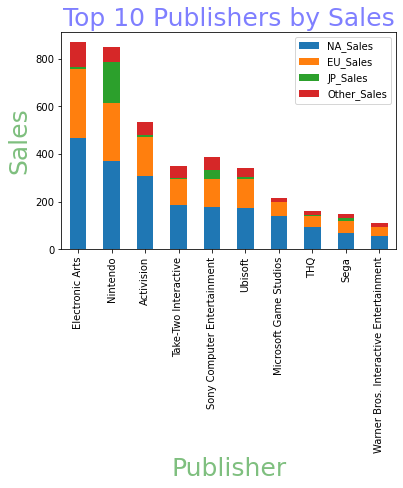

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
global_sales_publisher = df.pivot_table(index=['Publisher'], values=['NA_Sales','EU_Sales','JP_Sales','Other_Sales'], 
                                           aggfunc=np.sum).sort_values(['NA_Sales'], ascending=False)
global_sales_publisher = global_sales_publisher[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']]
ax = global_sales_publisher.iloc[0:10,:].plot(kind='bar', stacked=True, grid=False)
ax.set_title('Top 10 Publishers by Sales', size=25, color='blue', alpha=0.5)
ax.set_xlabel('Publisher', size=25, color='green', alpha=0.5)
ax.set_ylabel('Sales', size=25, color='green', alpha=0.5)
plt.show()

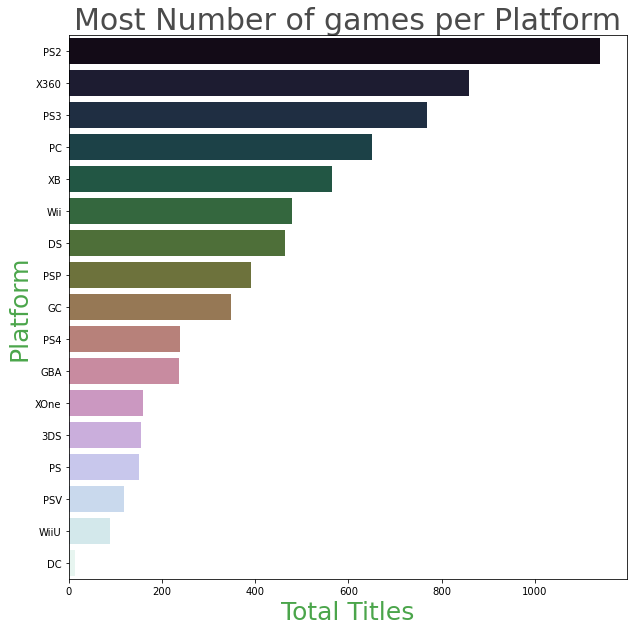

In [12]:
platform_name = df.Platform.value_counts()

plt.subplots(figsize=(10,10))
ax = sns.barplot(x=platform_name , y=platform_name .index, palette='cubehelix')
ax.set_title('Most Number of games per Platform', color='black', alpha=0.7, size=30)
ax.set_xlabel('Total Titles', color='green', alpha=0.7, size=25)
ax.set_ylabel('Platform', color='green', alpha=0.7, size=25)

plt.show()

Text(0.5, 1.0, 'Global Sales by Genre')

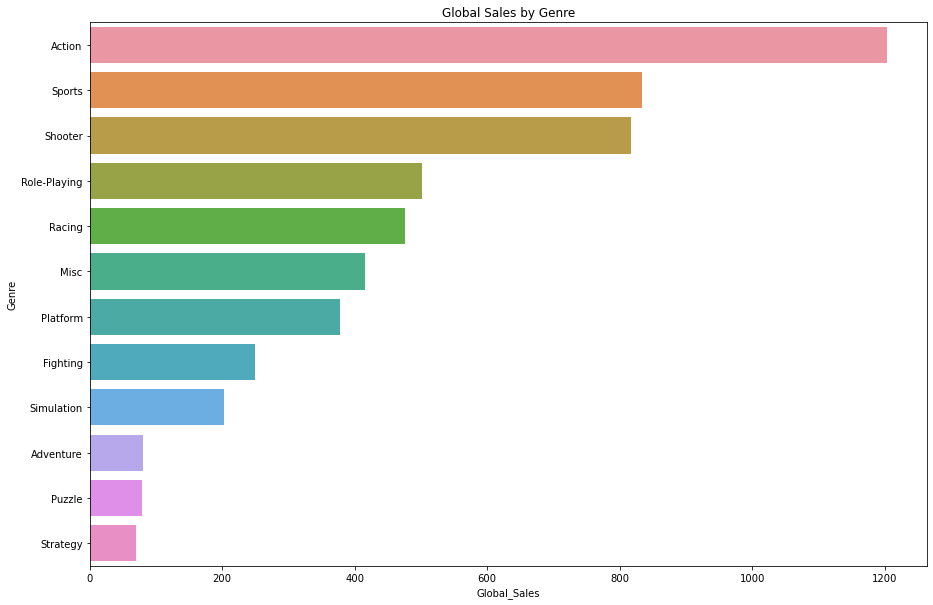

In [13]:
#Genre sales
plt.figure(figsize = (15,10))
x = df.groupby('Genre', as_index = False).sum().sort_values(by = 'Global_Sales', ascending = False)
sns.barplot(x = 'Global_Sales',
            y = 'Genre', data = x, orient = 'h')
plt.title('Global Sales by Genre')
#action games dominate the market

In [14]:
df[(df['Genre'] == 'Shooter') & (df['Year_of_Release'] > 2005)][['Name','Year_of_Release','Publisher','Platform','Global_Sales']].sort_values(by = 'Global_Sales', ascending = False).head(10)

,Name,Year_of_Release,Publisher,Platform,Global_Sales
29,Call of Duty: Modern Warfare 3,2011,Activision,X360,14.73
32,Call of Duty: Black Ops,2010,Activision,X360,14.61
34,Call of Duty: Black Ops II,2012,Activision,PS3,13.79
35,Call of Duty: Black Ops II,2012,Activision,X360,13.67
36,Call of Duty: Modern Warfare 2,2009,Activision,X360,13.47
37,Call of Duty: Modern Warfare 3,2011,Activision,PS3,13.32
41,Call of Duty: Black Ops,2010,Activision,PS3,12.63
44,Halo 3,2007,Microsoft Game Studios,X360,12.12
55,Call of Duty: Modern Warfare 2,2009,Activision,PS3,10.60
60,Call of Duty: Ghosts,2013,Activision,X360,10.25


In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns


In [18]:
#converting all features to numbers
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()
tbl = df
#convert all categorical features to numbers
for c in df.columns:
    if df[c].dtype == 'object':
         tbl[c] = lb_make.fit_transform(df[c])
tbl.head()

<ipython-input-18-f4686f3c62c7>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tbl[c] = lb_make.fit_transform(df[c])


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,4215,12,2006,10,160,41.36,28.96,3.77,8.45,82.53,76.0,51.0,72,322.0,771,1
2,2087,12,2008,6,160,15.68,12.76,3.79,3.29,35.52,82.0,73.0,75,709.0,771,1
3,4217,12,2009,10,160,15.61,10.93,3.28,2.95,32.77,80.0,73.0,72,192.0,771,1
6,2567,2,2006,4,160,11.28,9.14,6.50,2.88,29.80,89.0,65.0,77,431.0,771,1
7,4213,12,2006,3,160,13.96,9.18,2.93,2.84,28.92,58.0,41.0,58,129.0,771,1


In [19]:
#split dataset to training and testing
tbl = tbl #tbl[tbl['Year'] >= 2005]
X = tbl[['NA_Sales']] #tbl.loc[:,'Name':'NA_Sales']
y = tbl['Global_Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)
#Genre, platform, name, publisher scaled features does not improve testing score

In [21]:
lm  = LinearRegression()


In [22]:
lm.fit(X_train, y_train)
lm_score_train = lm.score(X_train, y_train)
print('Training score: ',lm_score_train)
lm_score_test = lm.score(X_test, y_test)
print('Testing score: ',lm_score_test)
print('Equation: ', str(lm.intercept_ ) + ' + ' + str(lm.coef_))

Training score:  0.92128344225782
Testing score:  0.8640390780704887
Equation:  -0.0005291873063433261 + [1.97631038]


In [21]:
predictions = lm.predict(X_test)
out_lr = pd.DataFrame({'Actual_Global_Sales': y_test, 'Predict_Global_Sales': predictions,'Diff' :(y_test-predictions)})
out_lr[['Actual_Global_Sales','Predict_Global_Sales','Diff']].head(5)



,Actual_Global_Sales,Predict_Global_Sales,Diff
146,6.03,6.284138,-0.254138
4427,0.44,0.335444,0.104556
6970,0.23,0.335444,-0.105444
3885,0.51,0.710943,-0.200943
11023,0.09,0.098286,-0.008286


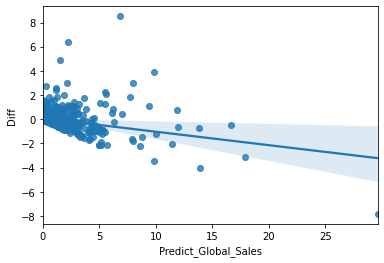

In [22]:
sns.regplot(out_lr['Predict_Global_Sales'],out_lr['Diff'])